importing libraries

In [144]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import math

specifying Times New Roman font and to force that withing plotting commands

In [145]:
tnr='Times New Roman'
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

uploading files with data to be plotted

In [146]:
file = 'SXV'
line_data=np.genfromtxt(file+'_Hewind+pow_data.txt')
line_pow=np.genfromtxt(file+'_pow_data.txt')
line_fitmodel=np.genfromtxt(file+'_Hewind_data.txt')

defining parameters specific to each spectral line

In [147]:
exposure_time = 86340

line_wavelength_1 = 5.0387
line_wavelength_2 = 5.0648
line_wavelength_3 = 5.1015

ObsID = '21659'
line_name = 'Mg XI'
norm = r'$2.34^{+0.12}_{-0.13}\times 10^{-4}$'
T_star = r'$1.09^{+0.41}_{-0.34}$'
R_o = r'$1.76^{+0.17}_{-0.14}$'
pho_num = '400'
chi_squared = '134.76'
v_terminal = 2250

defining rest wavelengths and shifted wavelengths

In [148]:
rest_wavelengths = [line_wavelength_1, line_wavelength_2, line_wavelength_3]
shifted_wavelengths = []
for i in (rest_wavelengths):
    shifted_wavelengths.append(i*(1+v_terminal/(3*(10**5))))
    shifted_wavelengths.append(i*(1-v_terminal/(3*(10**5))))

finding the number of data points

In [149]:
domain_MEG = 0
for i in range (0, int(np.size(line_data)/5)):
    if(str(line_data[i:i+1, 0:1]) != '[[nan]]'):
        domain_MEG = domain_MEG+1
    else:
        break

domain_HEG = 0
for i in range (domain_MEG*2+2,len(line_data)):
    if(str(line_data[i:i+1, 0:1]) != '[[nan]]'):
        domain_HEG = domain_HEG+1
    else:
        break   

choosing MEG or HEG

In [156]:
#If you want MEG type 0 else type 1
line_type = 0

plotting a fit of MEG or MEG+HEG

In [157]:
# If the fit is based on just MEG type 0, if the fit is based on MEG+HEG type 1
photon_num = 1

defining variables of fitmodel+pow data points

In [158]:
if line_type == 0:
    min_range = 0
    max_range = domain_MEG
    domain = domain_MEG
    line_tp = 'MEG'
    
else:
    min_range= domain_MEG*2+2
    max_range = domain_HEG+min_range
    domain = domain_HEG
    line_tp = 'HEG'
wavelength = line_data[min_range:max_range, 0:1]
data_binning = line_data[min_range:max_range, 1:2]
data = line_data[min_range:max_range, 2:3]+line_data[max_range+1:max_range+1+domain, 2:3]
data_error = np.sqrt(np.square(line_data[min_range:max_range, 3:4])+np.square(line_data[max_range+1:max_range+1+domain, 3:4]))
model = line_data[min_range:max_range, 4:5]+line_data[max_range+1:max_range+1+domain,4:5]

defining variables of pow model

In [159]:
model_pow = line_pow[min_range:max_range, 4:5]+line_pow[max_range+1:max_range+1+domain, 4:5]
hist_boundary_pow = np.sort(np.append(line_pow[min_range:max_range, 0:1]-line_pow[min_range:max_range, 1:2],line_pow[min_range:max_range, 0:1]+line_pow[min_range:max_range, 1:2]))[::-1]
hist_model_pow = []
for x in range(0, domain):
    model_set = float(model_pow[x])
    hist_model_pow.append(model_set)
    hist_model_pow.append(model_set)

defining variables of fitmodel

In [160]:
model_fitmodel = line_fitmodel[min_range:max_range, 4:5]+(np.max(line_data[min_range:max_range, 4:5])-np.max(line_fitmodel[min_range:max_range, 4:5]))+line_fitmodel[max_range+1:max_range+1+domain, 4:5]+(np.max(line_data[max_range+1:max_range+1+domain, 4:5])-np.max(line_fitmodel[max_range+1:max_range+1+domain, 4:5]))
hist_boundary_fitmodel = np.sort(np.append(line_fitmodel[min_range:max_range, 0:1]-line_fitmodel[min_range:max_range, 1:2],line_fitmodel[min_range:max_range, 0:1]+line_fitmodel[min_range:max_range, 1:2]))[::-1]
hist_model_fitmodel = []
for x in range(0, domain):
    model_set = float(model_fitmodel[x])
    hist_model_fitmodel.append(model_set)
    hist_model_fitmodel.append(model_set)

plotting the graph

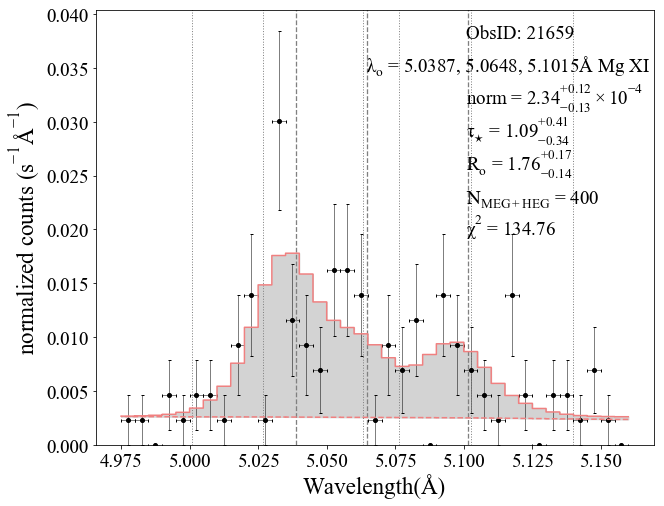

In [161]:
# determining plot size and labeling the plot

plt.figure(figsize = (10, 8))

plt.xlabel('Wavelength(Å)', fontname=tnr, fontsize=23)
plt.ylabel('normalized counts $(s^{-1}Å^{-1})$', fontname=tnr, fontsize=23)
plt.xticks(fontname=tnr, fontsize=19)
plt.yticks(fontname=tnr, fontsize=19)


# plotting data points and their error bars and bin widths

plt.plot(wavelength, data, 'o', color='black', markersize=4)
plt.errorbar(wavelength,data,xerr=data_binning, ls='none', color='black', linewidth=0.5,capsize=1.5,capthick=1)

#poisson error

photon_number=data*2*data_binning*exposure_time
poisson_error=np.divide(np.sqrt(photon_number),(2*data_binning*exposure_time))
plt.errorbar(wavelength,data,yerr=poisson_error, ls='none', color='black', linewidth=0.5,capsize=1.5,capthick=1)

plt.ylim(bottom=0.00)


#creating histogram for pow model

plt.plot(hist_boundary_pow, hist_model_pow, color='lightcoral',linestyle='dashed', markersize=1.5, linewidth=1.5)


#creating histogram for fitmodel

plt.plot(hist_boundary_fitmodel, hist_model_fitmodel, color='lightcoral', markersize=1.5, linewidth=1.5)
plt.fill_between(hist_boundary_fitmodel,hist_model_fitmodel, hist_model_pow , color='lightgrey')


# drawing vertical lins to indicate rest wavelengths

plt.vlines(rest_wavelengths, ymin=0, ymax = 1, color='grey', linestyle='--', linewidth = 1.3)
plt.vlines(shifted_wavelengths, ymin=0, ymax = 1, color='grey', linestyle=':', linewidth = 1.)


#adding text about model parameters, parameters depend on specific spectral line, must be changed for each spectral line

plt.figtext(0.64,0.83, 'ObsID: '+ObsID, fontname=tnr, fontsize=19)
plt.figtext(0.50,0.773, r'$\lambda_o$ = '+str(line_wavelength_1)+', '+str(line_wavelength_2)+', '+str(line_wavelength_3)+'Å '+line_name, fontname=tnr, fontsize=19)
plt.figtext(0.64,0.716,'norm = '+norm, fontname=tnr, fontsize=19)
plt.figtext(0.64,0.659,r'$\tau_{\star}$ = '+T_star, fontname=tnr, fontsize=19)
plt.figtext(0.64,0.602,r'$R_o$ = '+R_o, fontname=tnr, fontsize=19)
if photon_num == 0:
    plt.figtext(0.64,0.545,r'$N_{MEG}$ = '+pho_num, fontname=tnr, fontsize=19)
else:
    plt.figtext(0.64,0.545,r'$N_{MEG+HEG}$ = '+pho_num, fontname=tnr, fontsize=19)
plt.figtext(0.64,0.488,r'$\chi^2$ = '+chi_squared, fontname=tnr, fontsize=19)

plt.savefig(file+'_'+line_tp+'_spectra.png')
plt.show()
